In [128]:
from keras.datasets import mnist
import numpy as np
import random
import matplotlib.pyplot as plt

In [129]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [130]:
X = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [131]:
# Бінаризуємо зображення, встановлюючи порогове значення для інтенсивності пікселів
def binarize(image):
    return np.where(image >= 127, 1, 0)

In [132]:
# Обираємо еталонне зображення для кожного числа
reference_images = [binarize(X[random.choice(np.argwhere(y == i))[0]]) for i in range(10)]

In [133]:
# Додаємо Бернулівський шум до зображення, змінюючи піксель з заданою ймовірністю
def add_noise(image, p):
    noise = np.random.choice([0, 1], size=image.shape, p=[1 - p, p])
    return np.where(noise, 1 - image, image)

In [134]:
# Функція розпізнавання методом Байєса
def recognize(noisy_image):
    log_p = np.log(p)
    log_1_p = np.log(1 - p)
    likelihoods = [np.sum((noisy_image ^ reference) * log_p + (1 ^ noisy_image ^ reference) * log_1_p) for reference in reference_images]
    print(likelihoods)
    return np.argmax(likelihoods)

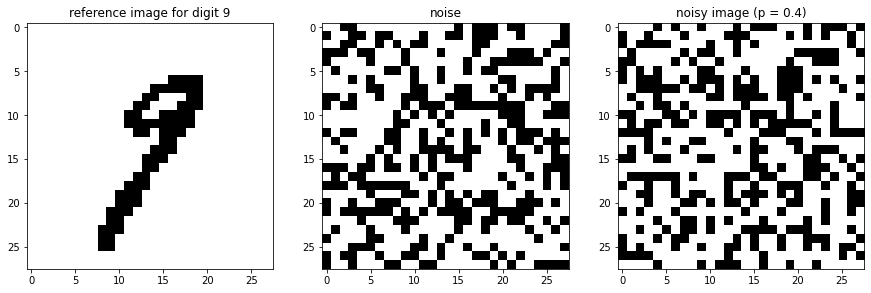

In [137]:
# Малюємо еталонну картинку, шум та зашумлену картинку
n = 9
p = 0.4
noise = np.random.choice([0, 1], size=reference_images[n].shape, p=[1 - p, p])

fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

axes[0].imshow(reference_images[n], cmap='binary')
axes[0].set_title("reference image for digit {}".format(n))

noise_arr = np.array(noise, dtype = "uint8")
axes[1].imshow(noise_arr, cmap='binary')
axes[1].set_title("noise")

noisy_image = add_noise(reference_images[n], p)
axes[2].imshow(noisy_image, cmap='binary')
axes[2].set_title("noisy image (p = {})".format(p))

plt.show()

In [138]:
recognition_result = recognize(noisy_image)
print("Recognition result: {}".format(recognition_result))

[-534.6962398163391, -526.992402762284, -531.4525189514737, -529.4251934109329, -531.4525189514737, -532.2634491676899, -539.1563560055289, -526.5869376541758, -529.8306585190411, -522.5322865730941]
Recognition result: 9
